In [1]:
import pymc3 as pm
import numpy as np
import pymc3.backends.ndarray
import matplotlib.pyplot as plt
from pymc3.step_methods.arraystep import ArrayStep
from pymc3 import Continuous


class MyStepMethod(ArrayStep):

    def __init__(self, vars, model=None):
        self.vars = vars
        model = pm.modelcontext(model)
        super(MyStepMethod, self).__init__(vars, [model.fastlogp])
        self.accrate = 0
        self.count = 0

    def astep(self, q0, logp):

        q = q0.copy()
        q[0] = np.random.normal(q[-1], 1)  # using current gamma value as mean

        logalt, logneu = logp(q0), logp(q)
        accept = logneu - logalt

        if (accept > 0) or (np.random.uniform(low=0, high=1) < np.exp(accept)):
            self.accrate += 1
            return q

        else:
            return q0

/home/junpenglao/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Sequential sampling (1 chains in 1 job)
CompoundStep
>MyStepMethod: [I, test]
>NUTS: [test]
100%|██████████| 6000/6000 [00:03<00:00, 1885.71it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


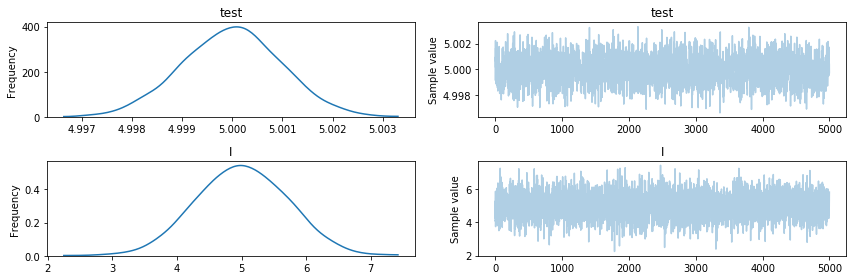

In [9]:
with pm.Model() as model:
    mean = pm.Normal("test", 5, 0.001)
    I = pm.Normal("I", mean,1)

    updI = MyStepMethod(vars=[I, mean])
    step1 = pm.NUTS(vars=[mean])
    trace = pm.sample(5000, [updI, step1], start={'I':0.5}, njobs=1, chains=1, tune=1000)

pm.traceplot(trace)
plt.show()

Sequential sampling (1 chains in 1 job)
CompoundStep
>MyStepMethod: [I, test]
>NUTS: [test]
100%|██████████| 6000/6000 [00:02<00:00, 2251.26it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


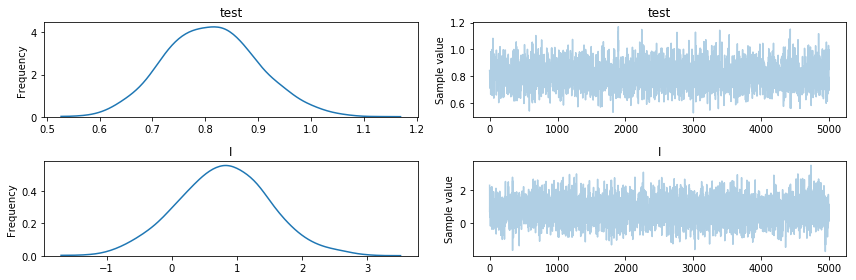

In [8]:
with pm.Model() as model:
    mean = pm.Gamma("test", 81, 100, transform=None)
    I = pm.Normal("I", mean,1)

    updI = MyStepMethod(vars=[I, mean])
    step1 = pm.NUTS(vars=[mean])
    trace = pm.sample(5000, [updI, step1], start={'I':0.5}, njobs=1, chains=1, tune=1000)

pm.traceplot(trace)
plt.show()